**Josh Aiken**<br>
**MSDS692**

# Will the Colorado Avalanche Return to the Playoffs in 2023? 

# Import data for both players and teams: 

**Data Retreived from www.nhl.com/stats/**

### Players
The player data contains up players expected to make up the starting roster for the Colorado Avalanche as of 9/20/2022. This includes up to the past 12 seasons a player has played, regardless of team. Most players will have at least 5 seasons worth of data, however, some will not. This is simply due to the fact that they are newer players who have not yet played that many seasons. Most players will not have 12 full years of data, but I wanted to stay consistent with my team numbers. 

The average career of an NHL player is 5 years (though there is a wide discrepancy between the top players and bottom players that results in this average). 

### Teams
The teams data contains the complete regular season totals for each team for the past 12 seasons. 

The challenge about the teams data is that ever since 1996, the NHL normally has an 82 game season. In 2012, there was a significantly shortened season due to a lockout. Due to COVID, the 2020 and 2021 seasons were also limited between 68-71 games, and 56 games respectively. This could cause issues with the data. 

## Players Column Title Meanings

- **S/C** = Shooting Handedness
- **Pos** = Position
- **GP** = Games Played
- **G** = Goals
- **A** = Assists
- **P** = Points (Each Goal or Assist is 1 point)
- **+/-** = Plus/Minus (Times a player is on the ice for a goal their team scored vs the other team)
- **PIM** = Penalty Minutes
- **P/GP** = Average Points per Game Played
- **EVG** = Even Strength Goals
- **EVP** = Even Strenght Points
- **PPG** = Power Play Goals
- **PPP** = Power Play Points
- **SHG** = Short Handed Goals
- **SHP** = Short Handed Points
- **OTG** = Over Time Goals 
- **GWG** = Game Winning Goals 
- **S** = Shots
- **S%** = Shot Percentage
- **TOI/GP** = Average Time On Ice per Game Played in Minutes
- **FOW%** = Faceoff Win Percentage

## Teams Column Title Meaning

- **GP** = Games Played 
- **W** = Wins (equals 2 Points/Win)
- **L** = Losses (equals 0 Points/Loss)
- **T** = Ties (equals 1 Point/Tie but no longer used)
- **OT** = Overtime Losses (equals 1 Point/Overtime Loss)
- **P** = Points 
- **P%** = Points Percentage
- **RW** = Regulation Wins
- **ROW** = Regulation and Overtime Wins
- **S/O** Wins = Shoot Out Wins
- **GF** = Goals For
- **GA** = Goals Against
- **GF/GP** = Average Goals For per Game Played
- **GA/GP** = Average Goals Against per Game Played
- **PP%** = Power Play Percentage
- **PK%** = Penalty Kill Percentage
- **Net PP%** = Net Power Play Percentage (factors in Shorthanded Goals Against the team's Power Play)
- **Net PK%** = Net Penalty Kill Percentage (factors in Shorthanded Goals For the teams' Penalty Kill)
- **Shots/GP** = Average Shots per Game Played
- **SA/GP** = Average Shots Against per Game Played 
- **FOW%** = Faceoff Win Percentage


## Goalies Column Title Meanings

- **S/C** = Shooting Handedness
- **GP** = Games Played
- **GS** = Games Started
- **W** = Wins
- **L** = Losses 
- **T** = Ties 
- **OT** = Overtime Losses
- **SA** = Shots Againsts
- **Svs** = Saves
- **GA** = Goals Against
- **Sv%** = Save Percentage
- **GAA** = Goals Against Average
- **TOI** = Time On Ice in Minutes
- **SO** = Shut Outs
- **G** = Goals
- **A** = Assists
- **P** = Points
- **PIM** = Penalty Minutes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit 

from pandas_profiling import ProfileReport
from tpot import TPOTRegressor

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from scikitplot.estimators import plot_feature_importances

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


C:\Users\joshu\anaconda3\envs\msds692\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


### Import Player Data: 

In [2]:
players = pd.read_csv("data/players_regular/full_team_skaters_10-22.csv")
players.head()

,Player,Season,Team,S/C,Pos,GP,G,A,P,+/-,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
0,Nathan MacKinnon,20212022,COL,R,C,65,32,56,88,22,...,7,27,0,0,1,5,299,10.7,21:04,45.4
1,Nathan MacKinnon,20202021,COL,R,C,48,20,45,65,22,...,8,25,0,0,0,2,206,9.7,20:22,48.5
2,Nathan MacKinnon,20192020,COL,R,C,69,35,58,93,13,...,12,31,0,0,2,4,318,11,21:13,43.1
3,Nathan MacKinnon,20182019,COL,R,C,82,41,58,99,20,...,12,37,0,0,1,6,365,11.2,22:05,43.7
4,Nathan MacKinnon,20172018,COL,R,C,74,39,58,97,11,...,12,32,0,1,3,12,284,13.7,19:54,41.9


### Import Goalie Data:

In [3]:
goalies = pd.read_csv("data/players_regular/full_team_goalies_10-22.csv")
goalies

,Player,Season,Team,S/C,GP,GS,W,L,T,OT,...,Svs,GA,Sv%,GAA,TOI,SO,G,A,P,PIM
0,Pavel Francouz,20192020,COL,R,34,31,21,7,--,4,...,919,77,0.923,2.41,1914:26:00,1,0,0,0,2
1,Pavel Francouz,20212022,COL,R,21,18,15,5,--,1,...,557,51,0.916,2.55,1200:09:00,2,0,0,0,0
2,Pavel Francouz,20182019,COL,R,2,0,0,2,--,0,...,33,2,0.943,1.96,61:11:00,0,0,0,0,0
3,Alexandar Georgiev,20192020,NYR,L,34,32,17,14,--,2,...,967,96,0.910,3.04,1891:57:00,2,0,1,1,0
4,Alexandar Georgiev,20212022,NYR,L,33,28,15,10,--,2,...,747,85,0.898,2.92,1746:06:00,2,0,0,0,0
5,Alexandar Georgiev,20182019,NYR,L,33,30,14,13,--,4,...,966,91,0.914,2.91,1874:10:00,2,0,2,2,2
6,Alexandar Georgiev,20202021,NYR,L,19,18,8,7,--,2,...,421,44,0.905,2.71,973:56:00,2,0,1,1,0
7,Alexandar Georgiev,20172018,NYR,L,10,9,4,4,--,1,...,304,27,0.918,3.15,514:46:00,0,0,0,0,0


### Import Team Data: 

In [4]:
teams = pd.read_csv("data/teams_regular/all_teams_10-22.csv")
teams.head()

,Team,Season,GP,W,L,T,OT,P,P%,RW,...,GA,GF/GP,GA/GP,PP%,PK%,Net PP%,Net PK%,Shots/GP,SA/GP,FOW%
0,Tampa Bay Lightning,20182019,82,62,16,--,4,128,0.780,49,...,221,3.89,2.70,28.2,85.0,27.1,89.5,32.0,32.1,51.2
1,Florida Panthers,20212022,82,58,18,--,6,122,0.744,42,...,242,4.11,2.95,24.4,79.5,21.4,84.2,37.3,30.7,48.2
2,Washington Capitals,20152016,82,56,18,--,8,120,0.732,45,...,191,3.02,2.33,21.9,85.2,19.9,85.9,30.6,28.4,49.6
3,Colorado Avalanche,20212022,82,56,19,--,7,119,0.726,46,...,232,3.76,2.83,24.0,79.7,22.2,82.2,35.0,32.0,47.3
4,Washington Capitals,20162017,82,55,19,--,8,118,0.720,45,...,177,3.18,2.16,23.1,83.8,21.9,85.7,30.4,27.8,49.8


## Players: Clean Up and Begin Any Feature Engineering

In [5]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  139 non-null    object 
 1   Season  139 non-null    int64  
 2   Team    139 non-null    object 
 3   S/C     139 non-null    object 
 4   Pos     139 non-null    object 
 5   GP      139 non-null    int64  
 6   G       139 non-null    int64  
 7   A       139 non-null    int64  
 8   P       139 non-null    int64  
 9   +/-     139 non-null    int64  
 10  PIM     139 non-null    int64  
 11  P/GP    139 non-null    float64
 12  EVG     139 non-null    int64  
 13  EVP     139 non-null    int64  
 14  PPG     139 non-null    int64  
 15  PPP     139 non-null    int64  
 16  SHG     139 non-null    int64  
 17  SHP     139 non-null    int64  
 18  OTG     139 non-null    int64  
 19  GWG     139 non-null    int64  
 20  S       139 non-null    int64  
 21  S%      139 non-null    object 
 22  TO

In [6]:
players["S%"].sort_values().head()

38    --
50     0
24     0
28     0
67     0
Name: S%, dtype: object

Looks like there is a -- which should be coverted to a 0

In [7]:
players["FOW%"].sort_values().head(5)

138    --
105    --
103    --
102    --
100    --
Name: FOW%, dtype: object

For FOW% and S% we have multiple "--" values that are causing the column to be listed as object. I will convert these to 0. They exist because some players have not taken a shot or attempted a face off. 

In [8]:
players = players.replace(to_replace="--", value=0)

In [9]:
players["S%"] = players["S%"].astype(float)
players["FOW%"] = players["FOW%"].astype(float)

The time column is in a time format, but for my evaluations I need it represted as a decimal based on minutes. 

In [10]:
#Defining a function to change all the times in TOI/GP to float format

def time_to_decimals(x): 
    t = x.split(":")
    minutes = t[0] if len(t) > 0 else 0.0
    seconds = t[1] if len(t) > 1 else 0.0
    return float(minutes) + round((float(seconds)/60), 2)

In [11]:
players["TOI/GP"] = players["TOI/GP"].apply(lambda x: time_to_decimals(x))

In [12]:
players.head()

,Player,Season,Team,S/C,Pos,GP,G,A,P,+/-,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
0,Nathan MacKinnon,20212022,COL,R,C,65,32,56,88,22,...,7,27,0,0,1,5,299,10.7,21.07,45.4
1,Nathan MacKinnon,20202021,COL,R,C,48,20,45,65,22,...,8,25,0,0,0,2,206,9.7,20.37,48.5
2,Nathan MacKinnon,20192020,COL,R,C,69,35,58,93,13,...,12,31,0,0,2,4,318,11.0,21.22,43.1
3,Nathan MacKinnon,20182019,COL,R,C,82,41,58,99,20,...,12,37,0,0,1,6,365,11.2,22.08,43.7
4,Nathan MacKinnon,20172018,COL,R,C,74,39,58,97,11,...,12,32,0,1,3,12,284,13.7,19.90,41.9


Now the column for TOI/GP still represents time in minutes, but in a decimal format that will be easier to work with. 

While robust in detail, I don't need some of these statistics for the players. I will drop the Team, and S/C columns for now. 

I will convert the "Pos" column (Position) to numerical by the following convertion: 
- Center (C) = 1
- Left Wing (L) = 2
- Right Wing (R) = 3
- Defense (D) = 4

I will also need to adjust how the season column is represented. I will just set the season column to the final year of that specific season. 
For example, the 2021-2022 season, currently listed as 20212022 will be updated to 2022. 


In [13]:
players.drop(["Team", "S/C"], axis=1, inplace=True)

In [14]:
players["Pos"].replace("C", 1, inplace=True) # Center = 1
players["Pos"].replace("L", 2, inplace=True) # Left Wing = 2
players["Pos"].replace("R", 3, inplace=True) # Right Wing = 3
players["Pos"].replace("D", 4, inplace=True) # Defenseman = 4

In [15]:
players.head()

,Player,Season,Pos,GP,G,A,P,+/-,PIM,P/GP,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
0,Nathan MacKinnon,20212022,1,65,32,56,88,22,42,1.35,...,7,27,0,0,1,5,299,10.7,21.07,45.4
1,Nathan MacKinnon,20202021,1,48,20,45,65,22,37,1.35,...,8,25,0,0,0,2,206,9.7,20.37,48.5
2,Nathan MacKinnon,20192020,1,69,35,58,93,13,12,1.35,...,12,31,0,0,2,4,318,11.0,21.22,43.1
3,Nathan MacKinnon,20182019,1,82,41,58,99,20,34,1.21,...,12,37,0,0,1,6,365,11.2,22.08,43.7
4,Nathan MacKinnon,20172018,1,74,39,58,97,11,55,1.31,...,12,32,0,1,3,12,284,13.7,19.90,41.9


In [16]:
#Code to replace the messy season column with a more simple representation of the last year of that specific season.
players["Season"] = players["Season"].apply(lambda x: (2000+(abs(x)%100)))

In [17]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  139 non-null    object 
 1   Season  139 non-null    int64  
 2   Pos     139 non-null    int64  
 3   GP      139 non-null    int64  
 4   G       139 non-null    int64  
 5   A       139 non-null    int64  
 6   P       139 non-null    int64  
 7   +/-     139 non-null    int64  
 8   PIM     139 non-null    int64  
 9   P/GP    139 non-null    float64
 10  EVG     139 non-null    int64  
 11  EVP     139 non-null    int64  
 12  PPG     139 non-null    int64  
 13  PPP     139 non-null    int64  
 14  SHG     139 non-null    int64  
 15  SHP     139 non-null    int64  
 16  OTG     139 non-null    int64  
 17  GWG     139 non-null    int64  
 18  S       139 non-null    int64  
 19  S%      139 non-null    float64
 20  TOI/GP  139 non-null    float64
 21  FOW%    139 non-null    float64
dtypes:

In [18]:
players.head(20)

,Player,Season,Pos,GP,G,A,P,+/-,PIM,P/GP,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
0,Nathan MacKinnon,2022,1,65,32,56,88,22,42,1.35,...,7,27,0,0,1,5,299,10.7,21.07,45.4
1,Nathan MacKinnon,2021,1,48,20,45,65,22,37,1.35,...,8,25,0,0,0,2,206,9.7,20.37,48.5
2,Nathan MacKinnon,2020,1,69,35,58,93,13,12,1.35,...,12,31,0,0,2,4,318,11.0,21.22,43.1
3,Nathan MacKinnon,2019,1,82,41,58,99,20,34,1.21,...,12,37,0,0,1,6,365,11.2,22.08,43.7
4,Nathan MacKinnon,2018,1,74,39,58,97,11,55,1.31,...,12,32,0,1,3,12,284,13.7,19.90,41.9
5,Nathan MacKinnon,2017,1,82,16,37,53,-14,16,0.65,...,2,14,2,2,2,4,251,6.4,19.95,50.6
6,Nathan MacKinnon,2016,1,72,21,31,52,-4,20,0.72,...,7,16,0,1,0,6,245,8.6,18.87,48.4
7,Nathan MacKinnon,2015,1,64,14,24,38,-7,34,0.59,...,3,7,0,0,0,2,192,7.3,17.05,47.0
8,Nathan MacKinnon,2014,1,82,24,39,63,20,26,0.77,...,8,17,0,0,0,5,241,10.0,17.35,42.9
9,J.T. Compher,2022,2,70,18,15,33,6,25,0.47,...,4,6,1,1,0,0,102,17.7,16.32,51.4


The 2013 season was signifantly shortened due to a lockout, so this would cause a skew in my data if included. Since MOST players have not played in 2013, removing the 2013 season will affect only a small percentage of players and likely help provide more accurate season focuses statistics. 

I also then decided that if a player had more than 5 seasons worth of data, I would remove their 2021 season from the dataframe as well. My reasoning behind this is that the 2021 season was also signifantly shortened. The 2020 season was also shortned, but only by between 11-14 games compared to being 30+ games different. 

I chose to keep the 2021 season for players with less than 5 years of data because I felt it was skewing the data the other direction with a lack of other seasons to fill in the gaps, especially for those players with only 2-3 years of data. 

In [19]:
players = players[players["Season"] != 2013]

In [20]:
players = (players.groupby("Player").apply(lambda subset: subset if len(subset) <= 5 else subset.query("Season != 2021")).reset_index(drop=True))

In [21]:
players.head(20)

,Player,Season,Pos,GP,G,A,P,+/-,PIM,P/GP,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
0,Alex Newhook,2022,1,71,13,20,33,11,12,0.46,...,3,6,0,0,0,5,113,11.5,13.57,34.7
1,Alex Newhook,2021,1,6,0,3,3,5,2,0.50,...,0,0,0,0,0,0,8,0.0,13.68,43.2
2,Andrew Cogliano,2014,1,82,21,21,42,13,28,0.51,...,0,0,3,5,0,5,157,13.4,15.40,40.7
3,Andrew Cogliano,2017,1,82,16,19,35,11,26,0.43,...,0,0,3,4,0,2,178,9.0,15.13,44.4
4,Andrew Cogliano,2018,1,80,12,23,35,18,41,0.44,...,0,0,3,4,0,1,175,6.9,15.20,49.3
5,Andrew Cogliano,2011,1,82,11,24,35,-12,64,0.43,...,0,5,1,3,0,3,129,8.5,17.25,41.6
6,Andrew Cogliano,2016,1,82,9,23,32,2,28,0.39,...,0,0,2,3,0,3,131,6.9,14.43,35.3
7,Andrew Cogliano,2015,1,82,15,14,29,5,14,0.35,...,0,0,3,3,0,2,134,11.2,14.60,32.7
8,Andrew Cogliano,2012,1,82,13,13,26,-4,15,0.32,...,2,3,0,0,0,2,115,11.3,14.70,42.0
9,Andrew Cogliano,2019,1,78,6,11,17,1,22,0.22,...,1,1,0,0,0,1,106,5.7,12.58,37.9


The only object datatype now is the Player name column. I will keep for now but that will also be dropped eventually.

Because the main team statistics that influence making the playoffs or note are wins (regulation, regulation and overtime, wins overall including shootouts), loses, goals for/game played, goals against/game played, and ultimately point percentage, the biggest predictable measure for players is goals for, goals for/game played, goals against (goalies), and goals against/game played (goalies). 

Due to this, I will clean up the data to remove the columns we don't need.

Need to clean up the players data by removing additional unneeded columns and leaving only the columns that can be converted to overall team data. 

I also need to simplify this down to one row per player displaying their averages over the seasons. 

In [22]:
players_clean = players.drop(["Season", "A", "P", "+/-", "PIM", "P/GP", "EVG", "EVP", "SHP", "GWG", "PPG", "PPP", "SHG", "OTG", "FOW%"], axis=1)

In [23]:
players_clean

,Player,Pos,GP,G,S,S%,TOI/GP
0,Alex Newhook,1,71,13,113,11.5,13.57
1,Alex Newhook,1,6,0,8,0.0,13.68
2,Andrew Cogliano,1,82,21,157,13.4,15.40
3,Andrew Cogliano,1,82,16,178,9.0,15.13
4,Andrew Cogliano,1,80,12,175,6.9,15.20
...,...,...,...,...,...,...,...
118,Valeri Nichushkin,3,79,14,128,10.9,14.97
119,Valeri Nichushkin,3,79,9,139,6.5,13.93
120,Valeri Nichushkin,3,65,13,113,11.5,14.07
121,Valeri Nichushkin,3,57,0,65,0.0,11.92


In [24]:
players_comb = pd.DataFrame()
players_comb = players_clean.groupby("Player")[["GP", "Pos", "G", "S", "S%", "TOI/GP"]].transform("mean")
players_comb["Player"] = players_clean["Player"]

Combine the players individual season stats to combine one row per player representing their average stats. 

In [25]:
players_comb.head(10)

,GP,Pos,G,S,S%,TOI/GP,Player
0,38.5,1.0,6.5,60.5,5.75,13.625,Alex Newhook
1,38.5,1.0,6.5,60.5,5.75,13.625,Alex Newhook
2,79.2,1.0,11.0,126.8,8.26,14.443,Andrew Cogliano
3,79.2,1.0,11.0,126.8,8.26,14.443,Andrew Cogliano
4,79.2,1.0,11.0,126.8,8.26,14.443,Andrew Cogliano
5,79.2,1.0,11.0,126.8,8.26,14.443,Andrew Cogliano
6,79.2,1.0,11.0,126.8,8.26,14.443,Andrew Cogliano
7,79.2,1.0,11.0,126.8,8.26,14.443,Andrew Cogliano
8,79.2,1.0,11.0,126.8,8.26,14.443,Andrew Cogliano
9,79.2,1.0,11.0,126.8,8.26,14.443,Andrew Cogliano


In [26]:
players_comb["Shots/GP"] = round(players_comb["S"] / players_comb["GP"])
players_comb["GF/GP"] = round(players_comb["G"] / players_comb["GP"],2)
players_comb["GP"] = round(players_comb["GP"])
players_comb["G"] = round(players_comb["G"])
players_comb["S"] = round(players_comb["S"])
players_comb["S%"] = round(players_comb["S%"], 2)
players_comb["TOI/GP"] = round(players_comb["TOI/GP"],2)

In [27]:
players_comb = players_comb[["Player", "Pos", "GP", "G", "GF/GP", "S", "Shots/GP", "S%", "TOI/GP"]]
players_comb.drop_duplicates(subset= "Player", inplace=True)

In [28]:
players_comb.head(5)

,Player,Pos,GP,G,GF/GP,S,Shots/GP,S%,TOI/GP
0,Alex Newhook,1.0,38.0,6.0,0.17,60.0,2.0,5.75,13.62
2,Andrew Cogliano,1.0,79.0,11.0,0.14,127.0,2.0,8.26,14.44
12,Artturi Lehkonen,2.0,73.0,15.0,0.20,159.0,2.0,9.32,15.29
17,Ben Meyers,1.0,5.0,1.0,0.20,8.0,2.0,12.50,9.95
18,Bowen Byram,4.0,24.0,2.0,0.10,35.0,1.0,5.10,18.16


## Create a Weighted System to apply an increase to the averages to players likely to score higher than their averages: 

 Use Games Played (GP), Average Time On Ice per Game (TOI/GP) average to add weight to certain players' statistics. 
 
 I will apply a 1.1 multiplier to the players' statistics if they are a Forward (Center, Left Wing, Right Wing), play 50 games or more in a season, and average 15:37 TOI or more. 
 I will also apply this multiplier to Defenseman who play 50 games or more in a season and average 20:11 TOI or more. 
 
 I chose these metrics because these players are playing over 60% of the games and when they do play, they play more than the average TOI for those positions. 
 
 I chose a 1.1 multiplier to increase these players' predicted outcomes without going to far for this first iteration. 

In [29]:
def apply_weight(df, weight):
    for i in df.index: 
        if ((df.loc[i,"Pos"]==4.0 and df.loc[i,"GP"]>=50 and df.loc[i,"TOI/GP"]>=20.11)
            or
            (df.loc[i,"Pos"]!=4.0 and df.loc[i,"GP"]>=50 and df.loc[i,"TOI/GP"]>=15.37)):
            df.loc[i,["G","GF/GP","S","Shots/GP", "S%"]]*=weight

In [30]:
apply_weight(players_comb, 1.1)

In [31]:
players_comb.loc[(players_comb["Pos"]==4.0) & (players_comb["GP"]>=50) & (players_comb["TOI/GP"] >=20.11)]

,Player,Pos,GP,G,GF/GP,S,Shots/GP,S%,TOI/GP
28,Cale Makar,4.0,59.0,17.6,0.297,170.5,3.3,10.747,23.67
41,Devon Toews,4.0,59.0,8.8,0.154,132.0,2.2,7.348,22.14
45,Erik Johnson,4.0,67.0,7.7,0.121,155.1,2.2,5.632,22.22
112,Samuel Girard,4.0,68.0,4.4,0.066,100.1,1.1,5.522,20.75


In [32]:
players_comb.loc[(players_comb["Pos"]!=4.0) & (players_comb["GP"]>=50) & (players_comb["TOI/GP"] >=15.37)]

,Player,Pos,GP,G,GF/GP,S,Shots/GP,S%,TOI/GP
61,Gabriel Landeskog,2.0,72.0,26.4,0.374,215.6,3.3,14.102,19.46
70,J.T. Compher,2.0,59.0,13.2,0.231,106.7,2.2,13.552,16.30
97,Mikko Rantanen,3.0,59.0,24.2,0.418,160.6,2.2,14.553,17.79
103,Nathan MacKinnon,1.0,74.0,30.8,0.418,301.4,4.4,10.846,19.69


In [33]:
players_comb["G"] = round(players_comb["G"])
players_comb["GF/GP"] = round(players_comb["GF/GP"], 2)
players_comb["S"] = round(players_comb["S"])
players_comb["S%"] = round(players_comb["S%"], 2)

In [34]:
players_comb.head(10)

,Player,Pos,GP,G,GF/GP,S,Shots/GP,S%,TOI/GP
0,Alex Newhook,1.0,38.0,6.0,0.17,60.0,2.0,5.75,13.62
2,Andrew Cogliano,1.0,79.0,11.0,0.14,127.0,2.0,8.26,14.44
12,Artturi Lehkonen,2.0,73.0,15.0,0.20,159.0,2.0,9.32,15.29
17,Ben Meyers,1.0,5.0,1.0,0.20,8.0,2.0,12.50,9.95
18,Bowen Byram,4.0,24.0,2.0,0.10,35.0,1.0,5.10,18.16
20,Brad Hunt,4.0,29.0,3.0,0.09,47.0,2.0,4.34,15.33
28,Cale Makar,4.0,59.0,18.0,0.30,170.0,3.3,10.75,23.67
31,Darren Helm,1.0,67.0,10.0,0.16,125.0,2.0,8.61,14.37
41,Devon Toews,4.0,59.0,9.0,0.15,132.0,2.2,7.35,22.14
45,Erik Johnson,4.0,67.0,8.0,0.12,155.0,2.2,5.63,22.22


### Begin creating a combined team from the players: 

In [35]:
team_pred =  pd.DataFrame()

team_pred["GF"] = [players_comb["G"].sum()]
team_pred["GF/GP"] = [players_comb["GF/GP"].sum()]
team_pred["S"] = [players_comb["S"].sum()]
team_pred["Shots/GP"] = [players_comb["Shots/GP"].sum()]
team_pred["S%"] = [round(players_comb["S%"].mean(),1)]

In [36]:
team_pred

,GF,GF/GP,S,Shots/GP,S%
0,211.0,3.8,2325.0,44.9,7.5


## Goalies: Clean Up and Begin Any Feature Engineering

In [37]:
goalies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  8 non-null      object 
 1   Season  8 non-null      int64  
 2   Team    8 non-null      object 
 3   S/C     8 non-null      object 
 4   GP      8 non-null      int64  
 5   GS      8 non-null      int64  
 6   W       8 non-null      int64  
 7   L       8 non-null      int64  
 8   T       8 non-null      object 
 9   OT      8 non-null      int64  
 10  SA      8 non-null      int64  
 11  Svs     8 non-null      int64  
 12  GA      8 non-null      int64  
 13  Sv%     8 non-null      float64
 14  GAA     8 non-null      float64
 15  TOI     8 non-null      object 
 16  SO      8 non-null      int64  
 17  G       8 non-null      int64  
 18  A       8 non-null      int64  
 19  P       8 non-null      int64  
 20  PIM     8 non-null      int64  
dtypes: float64(2), int64(14), object(5)
memory 

In [38]:
#Make essentially the same adjustments to the goalies_df as we did to the players_df
goalies.drop(["T", "Team", "S/C"], axis=1, inplace=True)
goalies["TOI"] = goalies["TOI"].apply(lambda x: time_to_decimals(x))
goalies["Season"] = goalies["Season"].apply(lambda x: (2000+(abs(x)%100)))

Ties have not been possible for years, so I removed that column completely as well as Team and S/C for the goalies DF. I also adjusted their time on ice column to decimal as well. 

In [39]:
goalies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  8 non-null      object 
 1   Season  8 non-null      int64  
 2   GP      8 non-null      int64  
 3   GS      8 non-null      int64  
 4   W       8 non-null      int64  
 5   L       8 non-null      int64  
 6   OT      8 non-null      int64  
 7   SA      8 non-null      int64  
 8   Svs     8 non-null      int64  
 9   GA      8 non-null      int64  
 10  Sv%     8 non-null      float64
 11  GAA     8 non-null      float64
 12  TOI     8 non-null      float64
 13  SO      8 non-null      int64  
 14  G       8 non-null      int64  
 15  A       8 non-null      int64  
 16  P       8 non-null      int64  
 17  PIM     8 non-null      int64  
dtypes: float64(3), int64(14), object(1)
memory usage: 1.2+ KB


## Teams: Clean Up and Begin Any Feature Engineering

In [40]:
teams.drop("T", axis=1, inplace=True)

Dropped the Ties column for the Teams DF as well. 

In [41]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      366 non-null    object 
 1   Season    366 non-null    int64  
 2   GP        366 non-null    int64  
 3   W         366 non-null    int64  
 4   L         366 non-null    int64  
 5   OT        366 non-null    int64  
 6   P         366 non-null    int64  
 7   P%        366 non-null    float64
 8   RW        366 non-null    int64  
 9   ROW       366 non-null    int64  
 10  S/O Win   366 non-null    int64  
 11  GF        366 non-null    int64  
 12  GA        366 non-null    int64  
 13  GF/GP     366 non-null    float64
 14  GA/GP     366 non-null    float64
 15  PP%       366 non-null    float64
 16  PK%       366 non-null    float64
 17  Net PP%   366 non-null    float64
 18  Net PK%   366 non-null    float64
 19  Shots/GP  366 non-null    float64
 20  SA/GP     366 non-null    float6

The only thing that needed adjusting for the team_df was removing the "T" feature. 

In [42]:
teams["Season"] = teams["Season"].apply(lambda x: (2000+(abs(x)%100)))

### Create Playoff Column: 

- 1 if the team made the playoffs that year
- 2 if the team did not make the playoffs that year

In [43]:
#add a column noting whether the team made the playoffs or not that season
conditions = [
    ((teams["Season"] == 2022) & (teams["P"] >= 97)), 
    ((teams["Season"] == 2021) & (teams["P"] >= 59) & (teams["Team"] != "Dallas Stars") & (teams["Team"] != "New York Rangers")), 
    ((teams["Season"] == 2020) & (teams["P"] >= 79) & (teams["Team"] != "Calgary Flames")),
    ((teams["Season"] == 2019) & (teams["P"] >= 90) & (teams["Team"] != "Montréal Canadiens")),
    ((teams["Season"] == 2018) & (teams["P"] >= 95) & (teams["Team"] != "Florida Panthers")),
    ((teams["Season"] == 2017) & (teams["P"] >= 94) & (teams["Team"] != "Tampa Bay Lightning") & (teams["Team"] != "New York Islanders")),
    ((teams["Season"] == 2016) & (teams["P"] >= 94) & (teams["Team"] != "Boston Bruins")),   
    ((teams["Season"] == 2015) & (teams["P"] >= 97)),
    ((teams["Season"] == 2014) & (teams["P"] >= 91)),
    ((teams["Season"] == 2013) & (teams["P"] >= 55) & (teams["Team"] != "Columbus Blue Jackets")),  
    ((teams["Season"] == 2012) & (teams["P"] >= 92)),
    ((teams["Season"] == 2011) & (teams["P"] >= 93) & (teams["Team"] != "Dallas Stars") & (teams["Team"] != "Calgary Flames"))
     ]

values = [1,1,1,1,1,1,1,1,1,1,1,1]

In [44]:
# 2022 = Top 16 teams made playoffs
# 2021 = Missed Playoffs due to conferences but in the points total = Dallas Stars, New York Rangers
# 2020 = NHL expanded the playoffs due to the shorten season from COVID. I chose to take the top 16 teams as that is a much better representation
# 2019 = Missed Playoffs due to conferences but in the points total = Montréal Canadiens
# 2018 = Missed Playoffs due to conferences but in the points total = Florida Panthers
# 2017 = Missed Playoffs due to conferences but in the points total = Tampa Bay Lightning, New York Islanders
# 2016 = Missed Playoffs due to conferences but in the points total = Boston Bruins
# 2015 = Top 16 teams made playoffs
# 2014 = Top 16 teams made playoffs
# 2013 = Missed Playoffs due to conferences but in the points total = Columbus Blue Jackets
# 2012 = Top 16 teams made playoffs
# 2011 = Missed Playoffs due to conferences but in the points total = Dallas Stars, Calgary Flames

In [45]:
teams["Playoffs"] = np.select(conditions, values)

We now have a column that represents whether a team made the playoffs that year or not. This will help us determine what type of statistics make up a playoff team.

In [46]:
teams[(teams["Playoffs"].values == 1) & (teams["Season"] == 2022)]

,Team,Season,GP,W,L,OT,P,P%,RW,ROW,...,GF/GP,GA/GP,PP%,PK%,Net PP%,Net PK%,Shots/GP,SA/GP,FOW%,Playoffs
1,Florida Panthers,2022,82,58,18,6,122,0.744,42,55,...,4.11,2.95,24.4,79.5,21.4,84.2,37.3,30.7,48.2,1
3,Colorado Avalanche,2022,82,56,19,7,119,0.726,46,52,...,3.76,2.83,24.0,79.7,22.2,82.2,35.0,32.0,47.3,1
8,Carolina Hurricanes,2022,82,54,20,8,116,0.707,47,53,...,3.38,2.44,22.0,88.0,20.7,89.5,34.1,28.2,53.9,1
10,Toronto Maple Leafs,2022,82,54,21,7,115,0.701,45,51,...,3.80,3.07,27.3,82.1,25.5,87.6,34.6,30.6,55.1,1
14,Minnesota Wild,2022,82,53,22,7,113,0.689,37,48,...,3.72,3.04,20.5,76.1,18.6,76.9,32.5,31.4,47.6,1
21,Calgary Flames,2022,82,50,21,11,111,0.677,44,48,...,3.55,2.51,22.9,83.2,21.6,86.0,35.5,29.0,51.1,1
22,New York Rangers,2022,82,52,24,6,110,0.671,44,48,...,3.05,2.49,25.2,82.3,24.3,85.8,29.2,30.8,48.1,1
23,Tampa Bay Lightning,2022,82,51,23,8,110,0.671,39,49,...,3.48,2.78,23.9,80.6,22.0,83.3,30.9,29.8,50.1,1
33,St. Louis Blues,2022,82,49,22,11,109,0.665,43,47,...,3.77,2.91,27.0,84.1,24.9,88.2,30.4,31.6,50.2,1
37,Boston Bruins,2022,82,51,26,5,107,0.652,40,49,...,3.09,2.66,21.2,81.3,18.6,83.2,36.1,28.7,54.2,1


Verifying that all represented playoffs teams are correct and that incorrect teams do not have a 1 in the playoff column. 

After verifying everything was correct, we can remove the team names

In [47]:
teams.drop("Team", axis=1, inplace=True)

## Remove Shortened Seasons: 

In [48]:
teams = teams[teams["Season"] != 2013]
teams = teams[teams["Season"] != 2020]
teams = teams[teams["Season"] != 2021]

## Create Additional Columns: 

- Shots = Shots/Games Played * Games Played
- Shot % = Shots/Total Goals Scored
- Shots Against = Shots Against/Games Played * Games Played

In [49]:
teams["S"] = round(teams["Shots/GP"] * teams["GP"])
teams["S%"] = round(teams["S"] / teams["GF"], 2)
teams["SA"] = round(teams["SA/GP"] * teams["GP"])

In [50]:
teams.head()

,Season,GP,W,L,OT,P,P%,RW,ROW,S/O Win,...,PK%,Net PP%,Net PK%,Shots/GP,SA/GP,FOW%,Playoffs,S,S%,SA
0,2019,82,62,16,4,128,0.780,49,56,6,...,85.0,27.1,89.5,32.0,32.1,51.2,1,2624.0,8.23,2632.0
1,2022,82,58,18,6,122,0.744,42,55,3,...,79.5,21.4,84.2,37.3,30.7,48.2,1,3059.0,9.08,2517.0
2,2016,82,56,18,8,120,0.732,45,52,4,...,85.2,19.9,85.9,30.6,28.4,49.6,1,2509.0,10.12,2329.0
3,2022,82,56,19,7,119,0.726,46,52,4,...,79.7,22.2,82.2,35.0,32.0,47.3,1,2870.0,9.32,2624.0
4,2017,82,55,19,8,118,0.720,45,53,2,...,83.8,21.9,85.7,30.4,27.8,49.8,1,2493.0,9.55,2280.0


## Created Two New DataFrames: 

- One for ONLY teams that made the playoffs
- One for ONLY teams that did NOT make the playoffs

In [51]:
playoff_teams = teams.loc[teams["Playoffs"] == 1]
no_playoff_teams = teams.loc[teams["Playoffs"] == 0]

# EDA: 

Running Pandas Profile Report to gain some starting insights. 

In [52]:
report = ProfileReport(players, minimal=True)
report.to_file("players_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [53]:
report = ProfileReport(goalies, minimal=True)
report.to_file("goalies_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
report = ProfileReport(teams, minimal=True)
report.to_file("teams_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
teams["Playoffs"].value_counts()

1    142
0    132
Name: Playoffs, dtype: int64

<AxesSubplot:ylabel='P'>

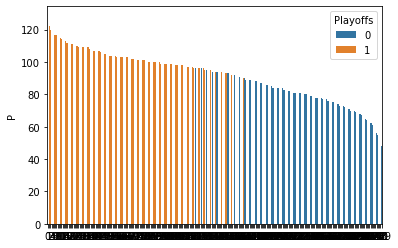

In [56]:
sns.barplot(data=teams, x=teams.index, y="P", hue="Playoffs")

Messy bottom row, but this verifies that in most cases, the more points a team gets, the better their playoff chances are. 

<AxesSubplot:ylabel='W'>

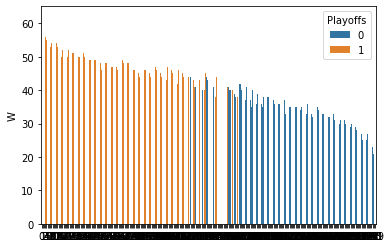

In [57]:
sns.barplot(data=teams, x=teams.index, y="W", hue="Playoffs")

Wins as well. It's worth noting thought that there are teams with higher quantities of wins and points that don't make the playoffs. We noticed this when we created the playoff column above, but worth noting again here. 

<AxesSubplot:xlabel='Season', ylabel='P'>

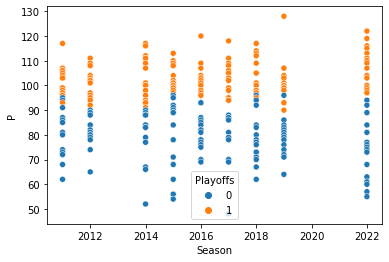

In [58]:
sns.scatterplot(data=teams, x="Season", y="P", hue="Playoffs")

<AxesSubplot:xlabel='Season', ylabel='P%'>

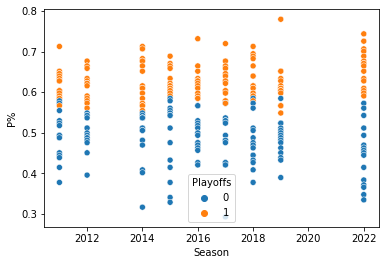

In [59]:
sns.scatterplot(data=teams, x="Season", y="P%", hue="Playoffs")

These two plots are important for the understanding that there are other factors beyond just point total or point percentage, as you can see, there are overlaps between the teams that made the playoffs and those that didn't in most of the data. The reason for this is the NHL's conference and division system, but for the most part, we can feel confident that points and point percentage play a very accurate role in representing a playoff team.

<AxesSubplot:>

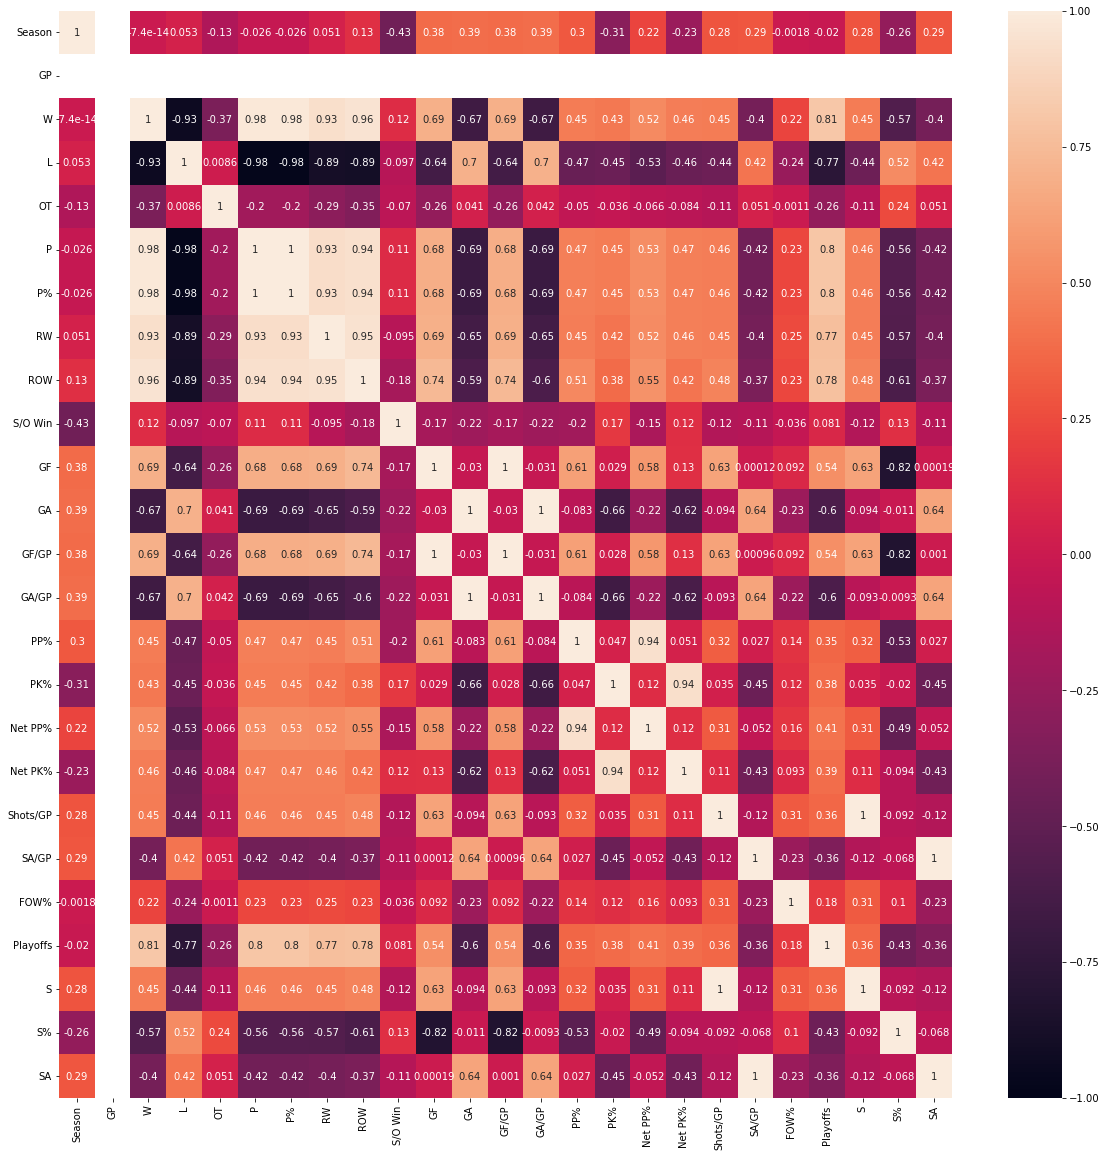

In [60]:
f = plt.figure(figsize=(20,20))
sns.heatmap(data=teams.corr(), vmin=-1, vmax=1, annot=True)

# Random Forest Modeling: 

Determining Feature Importance to Playoffs, Points, and Wins - as they are the primary drivers in making the playoffs. 

In [61]:
targets = teams["Playoffs"]
features = teams.drop("Playoffs", axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

In [62]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, bootstrap=True, random_state=42)
rfc.fit(x_train, y_train)

print(f"Training Score: {rfc.score(x_train, y_train)}")
print(f"Test Score: {rfc.score(x_test, y_test)}")

Training Score: 1.0
Test Score: 0.9272727272727272


<AxesSubplot:title={'center':'Feature Importance'}>

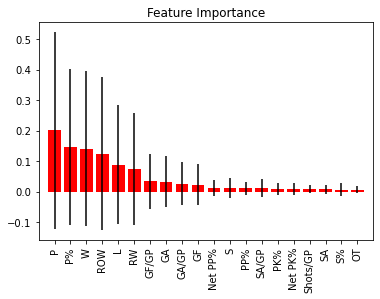

In [63]:
plot_feature_importances(rfc, feature_names=features.columns, x_tick_rotation=90)

Points are the most important to making the playoffs, unsurprisingly. 

In [64]:
targets2 = teams["P"]
features2 = teams.drop(["ROW", "RW", "L", "S/O Win", "P%", "P", "Playoffs"], axis=1)

x_train2, x_test2, y_train2, y_test2 = train_test_split(features2, targets2, test_size = 0.2, random_state = 42)

In [65]:
rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1, bootstrap=True, random_state=42)
rfr.fit(x_train2, y_train2)

print(f"Training Score: {rfr.score(x_train2, y_train2)}")
print(f"Test Score: {rfr.score(x_test2, y_test2)}")

Training Score: 0.9971425078415647
Test Score: 0.985468288761002


<AxesSubplot:title={'center':'Feature Importance'}>

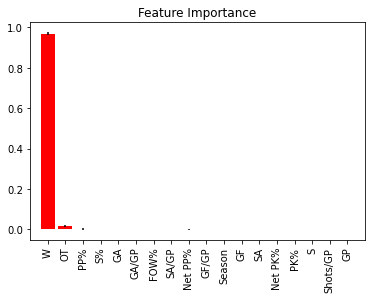

In [66]:
plot_feature_importances(rfr, feature_names=features2.columns, x_tick_rotation=90)

Also unsurprisingly, wins are the overall dominate indicator of points. This makes sense since a Win = 2 points and an overtime loss = 1 point. 

I removed ROW, RW, L, S/0 Win, P%, and Playoffs because they all obviously have close importance to Points and Wins. 

In [67]:
targets3 = teams["W"]
features3 = teams.drop(["W", "ROW", "RW", "L", "OT", "S/O Win", "P%", "P", "Playoffs"], axis=1)

x_train3, x_test3, y_train3, y_test3 = train_test_split(features3, targets3, test_size = 0.2, random_state = 42)

In [68]:
rfr2 = RandomForestRegressor(n_estimators=100, n_jobs=-1, bootstrap=True, random_state=42)
rfr2.fit(x_train3, y_train3)

print(f"Training Score: {rfr2.score(x_train3, y_train3)}")
print(f"Test Score: {rfr2.score(x_test3, y_test3)}")

Training Score: 0.9779975325873677
Test Score: 0.8589904946261413


<AxesSubplot:title={'center':'Feature Importance'}>

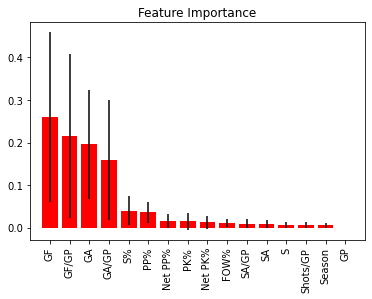

In [69]:
plot_feature_importances(rfr2, feature_names=features3.columns, x_tick_rotation=90)

As we could expect, wins are impacted the most by goals for and goals against. Obvious but important to validate. You need to score more goals than you have scored against you. 

An interesting feature is Shot %. That is the 5th feature of importance to wins, but you can see Shots and Shots/GP are two of the LOWEST features in terms of imporantance to wins. It suggests that it does not matter how many shots are taken but ultimately how successful those shots are. 

Growing up playing hockey we were always told to "just get the puck to the net." This suggests that mentality is wrong and quality is more important than quantity. 

# Analyze Team Data: 

Drop unneeded rows and focus on the rows that have the most importance, and that can directly be translated from the players statistics. 

In [70]:
teams_clean = teams.drop(["Season", "GP", "SA", "L", "P%", "P", "ROW", "RW", "S/O Win", "PP%", "PK%", "OT", "Net PP%", "Net PK%", "FOW%"], axis=1)

In [71]:
teams_clean = teams_clean[["W", "GF", "GF/GP", "GA", "GA/GP", "S", "Shots/GP", "S%", "SA/GP"]]

In [72]:
teams_clean.describe()

,W,GF,GF/GP,GA,GA/GP,S,Shots/GP,S%,SA/GP
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,41.000000,229.317518,2.796679,229.317518,2.796533,2507.598540,30.580657,11.044416,30.579562
std,7.838573,28.633300,0.349156,28.325643,0.345548,172.777375,2.106946,1.071812,2.057476
min,21.000000,150.000000,1.830000,155.000000,1.890000,1984.000000,24.200000,8.070000,25.500000
25%,35.000000,211.000000,2.570000,208.250000,2.542500,2394.000000,29.200000,10.360000,29.000000
50%,42.000000,227.000000,2.770000,226.500000,2.765000,2501.000000,30.500000,10.960000,30.600000
75%,47.000000,245.000000,2.990000,248.000000,3.020000,2616.000000,31.900000,11.717500,31.975000
max,62.000000,337.000000,4.110000,317.000000,3.870000,3059.000000,37.300000,14.510000,35.900000


In [73]:
playoff_teams_clean = playoff_teams.drop(["Season", "GP", "L", "P%", "P", "ROW", "RW", "S/O Win", "PP%", "PK%", "OT", "Net PP%", "Net PK%", "FOW%"], axis=1)

In [74]:
playoff_teams_clean = playoff_teams_clean[["W", "GF", "GF/GP", "GA", "GA/GP", "S", "Shots/GP", "SA", "SA/GP", "S%"]]

In [75]:
playoff_teams_clean.describe()

,W,GF,GF/GP,GA,GA/GP,S,Shots/GP,SA,SA/GP,S%
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,47.105634,244.105634,2.976901,213.084507,2.598380,2568.211268,31.319718,2449.387324,29.870423,10.600775
std,4.075019,26.283967,0.320612,19.586684,0.238859,159.605001,1.946382,141.808574,1.729297,0.941746
min,38.000000,188.000000,2.290000,155.000000,1.890000,2181.000000,26.600000,2148.000000,26.200000,8.070000
25%,44.000000,226.000000,2.760000,199.250000,2.432500,2452.000000,29.900000,2347.000000,28.625000,10.032500
50%,47.000000,240.500000,2.935000,212.000000,2.590000,2562.500000,31.250000,2444.000000,29.800000,10.575000
75%,50.000000,258.750000,3.157500,227.750000,2.777500,2679.000000,32.675000,2542.000000,31.000000,11.185000
max,62.000000,337.000000,4.110000,258.000000,3.150000,3059.000000,37.300000,2780.000000,33.900000,13.350000


In [76]:
no_playoff_teams_clean = no_playoff_teams.drop(["Season", "GP", "L", "P%", "P", "ROW", "RW", "S/O Win", "PP%", "PK%", "OT", "Net PP%", "Net PK%", "FOW%"], axis=1)

In [77]:
no_playoff_teams_clean = no_playoff_teams_clean[["W", "GF", "GF/GP", "GA", "GA/GP", "S", "Shots/GP", "SA", "SA/GP", "S%"]]

In [78]:
no_playoff_teams_clean.describe()

,W,GF,GF/GP,GA,GA/GP,S,Shots/GP,SA,SA/GP,S%
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,34.431818,213.409091,2.602803,246.780303,3.009697,2442.393939,29.785606,2570.053030,31.342424,11.521667
std,5.127673,21.746968,0.265210,25.811210,0.314766,162.867705,1.986102,173.387019,2.114621,0.998292
min,21.000000,150.000000,1.830000,195.000000,2.380000,1984.000000,24.200000,2091.000000,25.500000,9.530000
25%,31.000000,199.000000,2.430000,228.000000,2.780000,2357.750000,28.750000,2458.000000,29.975000,10.780000
50%,35.000000,212.500000,2.595000,244.000000,2.980000,2452.000000,29.900000,2554.000000,31.150000,11.375000
75%,38.000000,227.000000,2.770000,262.000000,3.200000,2536.000000,30.925000,2698.000000,32.900000,12.160000
max,44.000000,267.000000,3.260000,317.000000,3.870000,2829.000000,34.500000,2944.000000,35.900000,14.510000


# Goalies:

In [79]:
goalies

,Player,Season,GP,GS,W,L,OT,SA,Svs,GA,Sv%,GAA,TOI,SO,G,A,P,PIM
0,Pavel Francouz,2020,34,31,21,7,4,996,919,77,0.923,2.41,1914.43,1,0,0,0,2
1,Pavel Francouz,2022,21,18,15,5,1,608,557,51,0.916,2.55,1200.15,2,0,0,0,0
2,Pavel Francouz,2019,2,0,0,2,0,35,33,2,0.943,1.96,61.18,0,0,0,0,0
3,Alexandar Georgiev,2020,34,32,17,14,2,1063,967,96,0.910,3.04,1891.95,2,0,1,1,0
4,Alexandar Georgiev,2022,33,28,15,10,2,832,747,85,0.898,2.92,1746.10,2,0,0,0,0
5,Alexandar Georgiev,2019,33,30,14,13,4,1057,966,91,0.914,2.91,1874.17,2,0,2,2,2
6,Alexandar Georgiev,2021,19,18,8,7,2,465,421,44,0.905,2.71,973.93,2,0,1,1,0
7,Alexandar Georgiev,2018,10,9,4,4,1,331,304,27,0.918,3.15,514.77,0,0,0,0,0


In [80]:
goalies_clean = goalies.drop(["Season", "W", "L", "OT", "TOI", "SO", "G", "A", "P", "PIM"], axis=1)

In [81]:
goalies_clean

,Player,GP,GS,SA,Svs,GA,Sv%,GAA
0,Pavel Francouz,34,31,996,919,77,0.923,2.41
1,Pavel Francouz,21,18,608,557,51,0.916,2.55
2,Pavel Francouz,2,0,35,33,2,0.943,1.96
3,Alexandar Georgiev,34,32,1063,967,96,0.910,3.04
4,Alexandar Georgiev,33,28,832,747,85,0.898,2.92
5,Alexandar Georgiev,33,30,1057,966,91,0.914,2.91
6,Alexandar Georgiev,19,18,465,421,44,0.905,2.71
7,Alexandar Georgiev,10,9,331,304,27,0.918,3.15


In [82]:
goalies_comb = goalies_clean.groupby("Player")[["GP", "GS", "SA", "Svs", "GA", "Sv%", "GAA"]].transform("mean")

In [83]:
goalies_comb["Player"] = goalies_clean["Player"]

In [84]:
goalies_comb

,GP,GS,SA,Svs,GA,Sv%,GAA,Player
0,19.0,16.333333,546.333333,503.0,43.333333,0.927333,2.306667,Pavel Francouz
1,19.0,16.333333,546.333333,503.0,43.333333,0.927333,2.306667,Pavel Francouz
2,19.0,16.333333,546.333333,503.0,43.333333,0.927333,2.306667,Pavel Francouz
3,25.8,23.400000,749.600000,681.0,68.600000,0.909000,2.946000,Alexandar Georgiev
4,25.8,23.400000,749.600000,681.0,68.600000,0.909000,2.946000,Alexandar Georgiev
5,25.8,23.400000,749.600000,681.0,68.600000,0.909000,2.946000,Alexandar Georgiev
6,25.8,23.400000,749.600000,681.0,68.600000,0.909000,2.946000,Alexandar Georgiev
7,25.8,23.400000,749.600000,681.0,68.600000,0.909000,2.946000,Alexandar Georgiev


In [85]:
goalies_comb = goalies_comb[["Player", "GP", "GS", "SA", "Svs", "GA", "Sv%", "GAA"]]

In [86]:
goalies_comb = goalies_comb.drop_duplicates(subset= "Player")

In [87]:
goalies_comb

,Player,GP,GS,SA,Svs,GA,Sv%,GAA
0,Pavel Francouz,19.0,16.333333,546.333333,503.0,43.333333,0.927333,2.306667
3,Alexandar Georgiev,25.8,23.400000,749.600000,681.0,68.600000,0.909000,2.946000


In [88]:
goalies_comb["GS"] = round(goalies_comb["GS"], 1)
goalies_comb["SA"] = round(goalies_comb["SA"], 1)
goalies_comb["Svs"] = round(goalies_comb["Svs"], 1)
goalies_comb["GA"] = round(goalies_comb["GA"], 1)
goalies_comb["Sv%"] = round(goalies_comb["Sv%"], 2)
goalies_comb["GAA"] = round(goalies_comb["GAA"], 2)

In [89]:
goalies_comb["SA/GP"] = round(goalies_comb["SA"] / goalies_comb["GP"],2)

In [90]:
goalies_comb

,Player,GP,GS,SA,Svs,GA,Sv%,GAA,SA/GP
0,Pavel Francouz,19.0,16.3,546.3,503.0,43.3,0.93,2.31,28.75
3,Alexandar Georgiev,25.8,23.4,749.6,681.0,68.6,0.91,2.95,29.05


## SO, we have a bit of a problem here as these goalies have not averages A LOT of games played per season... This makes me think I need to work with the Teams data to focus more on the averages/game rather than overall numbers for shots against, goals against, etc

In [91]:
team_pred["GA/GP"] = round(goalies_comb["GAA"].mean(),2)
team_pred["SA/GP"] = round(goalies_comb["SA/GP"],2)

In [92]:
team_pred["GA"] = round((team_pred["GA/GP"] * 82), 1)

Created an estimated TOTAL goals against by multiplying the Goals Against average by 82 (which is the length of an NHL season)

In [93]:
team_pred = team_pred[["GF", "GF/GP", "GA", "GA/GP", "S", "Shots/GP", "S%", "SA/GP"]]

In [94]:
team_pred["GA"] = round(team_pred["GA"])

In [95]:
team_pred

,GF,GF/GP,GA,GA/GP,S,Shots/GP,S%,SA/GP
0,211.0,3.8,216.0,2.63,2325.0,44.9,7.5,28.75


# WHAT DOES THE DATA SHOW? 

In [96]:
print(f"Combined Estimated Avalanche Goals: {round(team_pred['GF'].sum())}")
print(f"Combined Estimated Avalanche Goals For per Game Played: {round(team_pred['GF/GP'].sum(),1)}")
print(f"Combined Estimated Avalanche Goals Against: {round(team_pred['GA'].sum())}")
print(f"Combined Estimated Avalanche Goals Against per Game Played: {round(team_pred['GA/GP'].sum(),2)}")
print(f"Combined Estimated Avalanche Shots: {round(team_pred['S'].sum())}")
print(f"Combined Estimated Avalanche Shots per Game: {round(team_pred['Shots/GP'].sum())}")
print(f"Combined Estimated Avalanche Shot Percentage: {round(team_pred['S%'].mean(), 2)}%")
print(f"Combined Estimated Avalanche Shot Against per Game Played: {round(team_pred['SA/GP'].mean())}")

Combined Estimated Avalanche Goals: 211
Combined Estimated Avalanche Goals For per Game Played: 3.8
Combined Estimated Avalanche Goals Against: 216
Combined Estimated Avalanche Goals Against per Game Played: 2.63
Combined Estimated Avalanche Shots: 2325
Combined Estimated Avalanche Shots per Game: 45
Combined Estimated Avalanche Shot Percentage: 7.5%
Combined Estimated Avalanche Shot Against per Game Played: 29


In [97]:
print(f"Combined Average Goals Scored For by Playoff Teams: {round(playoff_teams_clean['GF'].mean())}")
print(f"Combined Average Goals Scored For per Game Played by Playoff Teams: {round(playoff_teams_clean['GF/GP'].mean(),1)}")
print(f"Combined Average Goals Scored Against by Playoff Teams: {round(playoff_teams_clean['GA'].mean())}")
print(f"Combined Average Goals Scored Against per Game Played by Playoff Teams: {round(playoff_teams_clean['GA/GP'].mean(),2)}")
print(f"Combined Average Shots by Playoff Teams: {round(playoff_teams_clean['S'].mean())}")
print(f"Combined Average Shots per Game Played by Playoff Teams: {round(playoff_teams_clean['Shots/GP'].mean())}")
print(f"Combined Average Shots Percentage by Playoff Teams: {round(playoff_teams_clean['S%'].mean())}%")
print(f"Combined Average Shots Against per Game Played by Playoff Teams: {round(playoff_teams_clean['SA/GP'].mean())}")

Combined Average Goals Scored For by Playoff Teams: 244
Combined Average Goals Scored For per Game Played by Playoff Teams: 3.0
Combined Average Goals Scored Against by Playoff Teams: 213
Combined Average Goals Scored Against per Game Played by Playoff Teams: 2.6
Combined Average Shots by Playoff Teams: 2568
Combined Average Shots per Game Played by Playoff Teams: 31
Combined Average Shots Percentage by Playoff Teams: 11%
Combined Average Shots Against per Game Played by Playoff Teams: 30


## Explain the math differences between Shot and Shots/GP and Goals and Goals/GP: 

Because MOST players do not play all 82 games in season, I decided to look at both Goals/GP and Shots/GP differently than Goals OVERALL and Shots OVERALL. 
If you look at the math and multiple the GF/GP average by 82 games, you get a MUCH higher number than our overall Goals number shows. This is because Goals is taking the average of ACTUAL goals the players have scored vs the average per game played. Both numbers are good to look at but need to remain independant. 

For example, if a player plays in 10 out of 82 games and scores 10 goals in those games, his seasons statistics will show 10 goals on the season but 1.0 goals per game played. 

What this suggests to me for the Avalanche is that they have some new, young players who have skills and perform when they are playing, but have not yet racked up high games played totals. 

In [98]:
playoff_teams_clean[["W", "GF", "GF/GP", "GA", "GA/GP", "S", "Shots/GP", "S%", "SA/GP"]].describe()

,W,GF,GF/GP,GA,GA/GP,S,Shots/GP,S%,SA/GP
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,47.105634,244.105634,2.976901,213.084507,2.598380,2568.211268,31.319718,10.600775,29.870423
std,4.075019,26.283967,0.320612,19.586684,0.238859,159.605001,1.946382,0.941746,1.729297
min,38.000000,188.000000,2.290000,155.000000,1.890000,2181.000000,26.600000,8.070000,26.200000
25%,44.000000,226.000000,2.760000,199.250000,2.432500,2452.000000,29.900000,10.032500,28.625000
50%,47.000000,240.500000,2.935000,212.000000,2.590000,2562.500000,31.250000,10.575000,29.800000
75%,50.000000,258.750000,3.157500,227.750000,2.777500,2679.000000,32.675000,11.185000,31.000000
max,62.000000,337.000000,4.110000,258.000000,3.150000,3059.000000,37.300000,13.350000,33.900000


In [99]:
team_pred

,GF,GF/GP,GA,GA/GP,S,Shots/GP,S%,SA/GP
0,211.0,3.8,216.0,2.63,2325.0,44.9,7.5,28.75


In [100]:
teams_clean.head()

,W,GF,GF/GP,GA,GA/GP,S,Shots/GP,S%,SA/GP
0,62,319,3.89,221,2.70,2624.0,32.0,8.23,32.1
1,58,337,4.11,242,2.95,3059.0,37.3,9.08,30.7
2,56,248,3.02,191,2.33,2509.0,30.6,10.12,28.4
3,56,308,3.76,232,2.83,2870.0,35.0,9.32,32.0
4,55,261,3.18,177,2.16,2493.0,30.4,9.55,27.8


# TPOT Analysis

In [101]:
targets_w = teams_clean["W"]
features_w = teams_clean.drop("W", axis=1)

x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(features_w, targets_w, test_size = 0.2, random_state = 42)

In [102]:
%%time
tpot = TPOTRegressor(generations=5, population_size=100, verbosity=2, n_jobs=-1, scoring='r2', random_state=42)
tpot.fit(x_train_w, y_train_w)
print(tpot.score(x_test_w, y_test_w))

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8813835013153414

Generation 2 - Current best internal CV score: 0.8816545765817804

Generation 3 - Current best internal CV score: 0.8817170018762811

Generation 4 - Current best internal CV score: 0.8817170018762811

Generation 5 - Current best internal CV score: 0.8817170018762811

Best pipeline: ElasticNetCV(GradientBoostingRegressor(input_matrix, alpha=0.85, learning_rate=0.5, loss=lad, max_depth=1, max_features=0.5, min_samples_leaf=12, min_samples_split=18, n_estimators=100, subsample=1.0), l1_ratio=0.45, tol=0.0001)
0.9177399984979208
CPU times: total: 49.3 s
Wall time: 1min 10s


# Gradient Boosting Regressor Prediction: 

In [103]:
gbr_w = GradientBoostingRegressor(alpha=0.85, learning_rate=0.5, max_depth=1, max_features=0.5, min_samples_leaf=12, min_samples_split=18, n_estimators=100, subsample=1.0)
gbr_w.fit(x_train_w, y_train_w)

GradientBoostingRegressor(alpha=0.85, learning_rate=0.5, max_depth=1,
                          max_features=0.5, min_samples_leaf=12,
                          min_samples_split=18)

In [104]:
print(f"Training Score: {gbr_w.score(x_train_w, y_train_w)}")
print(f"Test Score: {gbr_w.score(x_test_w, y_test_w)}")

Training Score: 0.9204628660385125
Test Score: 0.8902546942099477


In [105]:
y_pred_gbr = gbr_w.predict(x_test_w)
mse_gbr = mean_squared_error(y_test_w, y_pred_gbr)

In [106]:
print(f"MSE: {round(mse_gbr, 2)}")

MSE: 6.91


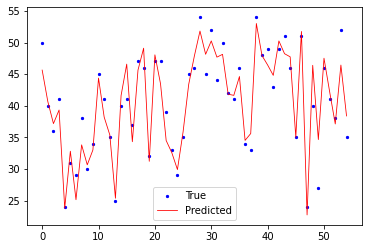

In [107]:
x_ax1 = range(len(y_test_w))
plt.scatter(x_ax1, y_test_w, s=5, color="blue", label="True")
plt.plot(x_ax1, y_pred_gbr, lw=0.8, color="red", label="Predicted")
plt.legend()
plt.show()

In [108]:
w_predict_gbr = gbr_w.predict(team_pred)
w_predict_gbr

array([57.0704381])

In [109]:
print(f"Based on our Gradient Boosting Model, the Avalanche are expected to win {round(w_predict_gbr[0])} games this season.")

Based on our Gradient Boosting Model, the Avalanche are expected to win 57 games this season.


# Random Forest Prediction: 

In [110]:
rfr_w = RandomForestRegressor(n_estimators=100, n_jobs=-1, bootstrap=True, random_state=42)
rfr_w.fit(x_train_w, y_train_w)

print(f"Training Score: {rfr_w.score(x_train_w, y_train_w)}")
print(f"Test Score: {rfr_w.score(x_test_w, y_test_w)}")

Training Score: 0.9784490883569761
Test Score: 0.8828360684155785


In [111]:
y_pred_rfr = rfr_w.predict(x_test_w)
mse_rfr = mean_squared_error(y_test_w, y_pred_rfr)
print(f"MSE: {round(mse_rfr, 2)}")

MSE: 7.37


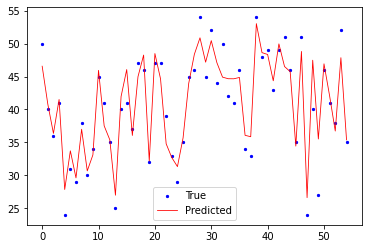

In [112]:
x_ax2 = range(len(y_test_w))
plt.scatter(x_ax2, y_test_w, s=5, color="blue", label="True")
plt.plot(x_ax2, y_pred_rfr, lw=0.8, color="red", label="Predicted")
plt.legend()
plt.show()

In [113]:
w_predict_rfr = rfr_w.predict(team_pred)
w_predict_rfr

array([46.53])

In [114]:
print(f"Based on our Random Forest Model, the Avalanche are expected to win {round(w_predict_rfr[0])} games this coming season.")

Based on our Random Forest Model, the Avalanche are expected to win 47 games this coming season.


# Extra Trees Regression Prediction

In [115]:
etr_w = ExtraTreesRegressor(n_estimators=100, n_jobs=-1, bootstrap=True, random_state=42)
etr_w.fit(features_w, targets_w)

ExtraTreesRegressor(bootstrap=True, n_jobs=-1, random_state=42)

In [116]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(etr_w, features_w, targets_w, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1, error_score="raise")

In [117]:
print(f"MAE: {n_scores.mean()}")
print(f"STD: {n_scores.std()}")

MAE: -2.222176807760141
STD: 0.3605658720996647


In [118]:
w_predict_etr = etr_w.predict(team_pred)
w_predict_etr

array([48.03])

In [119]:
print(f"Based on our Extra Trees Model, the Avalanche are expected to win {round(w_predict_etr[0])} games this coming season.")

Based on our Extra Trees Model, the Avalanche are expected to win 48 games this coming season.


## We now have 3 models' predictions. 
- Gradient Boosting Regressor Prediction: 57 Wins
- Random Forest Regressor Prediction: 47 Wins
- Extra Trees Regression Prediction: 48 Wins

The Gradient Boosting Regressor had a slightly better Mean Squared Error than the Random Forest Regressor so I would be inclined to lean toward 57 wins as more accurate. But, the Random Forest and Extra Trees Regressor 46.53 and 48 wins respectively. The Extra Trees model also has a good Negative Mean Absolute Error (I could not figure out how to check the Mean Squared Error on the Extra Trees model). 

Because of this, I will leverage the average between the models. 

In [120]:
team_pred["W"] = round((w_predict_rfr[0]+w_predict_gbr[0])/2)

In [121]:
team_pred = team_pred[["W", "GF", "GF/GP", "GA", "GA/GP", "S", "Shots/GP", "S%", "SA/GP"]]
team_pred

,W,GF,GF/GP,GA,GA/GP,S,Shots/GP,S%,SA/GP
0,52,211.0,3.8,216.0,2.63,2325.0,44.9,7.5,28.75


Worth highlighting that GF and GF/GP, while GA and GA/GP are. GF/GP does not equal the total of GF (211) divided by 82 games played as that would equal 2.57. 
This is because the GF statistic is created from the averages from each specific player, as are the GF/GP average. 

We had to created the GA total due to the lack of overall season data from the Goalies. 

# Playoff Predictions:

# Random Forest Classifier

In [122]:
teams_playoff_clean = teams.drop(["Season", "GP", "SA", "L", "P%", "P", "ROW", "RW", "S/O Win", "PP%", "PK%", "OT", "Net PP%", "Net PK%", "FOW%"], axis=1)
teams_playoff_clean = teams_playoff_clean[["W", "GF", "GF/GP", "GA", "GA/GP", "S", "Shots/GP", "S%", "SA/GP", "Playoffs"]]
teams_playoff_clean

,W,GF,GF/GP,GA,GA/GP,S,Shots/GP,S%,SA/GP,Playoffs
0,62,319,3.89,221,2.70,2624.0,32.0,8.23,32.1,1
1,58,337,4.11,242,2.95,3059.0,37.3,9.08,30.7,1
2,56,248,3.02,191,2.33,2509.0,30.6,10.12,28.4,1
3,56,308,3.76,232,2.83,2870.0,35.0,9.32,32.0,1
4,55,261,3.18,177,2.16,2493.0,30.4,9.55,27.8,1
...,...,...,...,...,...,...,...,...,...,...
332,24,165,2.01,267,3.26,2394.0,29.2,14.51,33.2,0
338,22,218,2.66,317,3.87,2444.0,29.8,11.21,34.4,0
340,23,153,1.87,269,3.28,1984.0,24.2,12.97,35.6,0
341,21,150,1.83,243,2.96,2157.0,26.3,14.38,34.3,0


In [123]:
targets_p = teams_playoff_clean["Playoffs"]
features_p = teams_playoff_clean.drop("Playoffs", axis=1)

x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(features_p, targets_p, test_size = 0.2, random_state = 42)

In [124]:
rfc_p = RandomForestClassifier(n_estimators=100, n_jobs=-1, bootstrap=True, random_state=42)
rfc_p.fit(x_train_p, y_train_p)

print(f"Training Score: {rfc_p.score(x_train_p, y_train_p)}")
print(f"Test Score: {rfc_p.score(x_test_p, y_test_p)}")

Training Score: 1.0
Test Score: 0.9272727272727272


In [125]:
y_pred_rfc_p = rfc_p.predict(x_test_p)
mse_rfc_p = mean_squared_error(y_test_p, y_pred_rfc_p)
print(f"MSE: {round(mse_rfc_p, 2)}")

MSE: 0.07


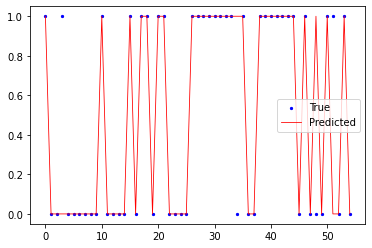

In [126]:
x_ax4 = range(len(y_test_p))
plt.scatter(x_ax4, y_test_p, s=5, color="blue", label="True")
plt.plot(x_ax4, y_pred_rfc_p, lw=0.8, color="red", label="Predicted")
plt.legend()
plt.show()

In [127]:
w_predict_rfc_p = rfc_p.predict(team_pred)
w_predict_rfc_p

array([1])

The above Random Forest Model suggests that based on our expected player performance, the Avalanche SHOULD return to the playoffs this coming season. 


In [128]:
w_predict_prob = rfc_p.predict_proba(team_pred)
w_predict_prob

array([[0.13, 0.87]])

In [129]:
print(f"According to our predicted statistics, the Avalanche have an {(100*(w_predict_prob[0][1]))}% chance of returning to the playoffs.")

According to our predicted statistics, the Avalanche have an 87.0% chance of returning to the playoffs.


The above blocks use our Random Forest Model and predicts that based on our expected team results, the Avalanche will return to the playoffs in this coming season and represent a strong probability that prediction is correct at 87%. 

We also know, based on the metrics we checked above, the 75% quartile for Wins among all teams was 47 Wins. The 75% quartile for teams that make the playoffs was 50 Wins with a max Win total among the last 12 years of 62 games. 

This suggests to us that the Avalanche predicted Win total of 52 games should realistically put them within the top 4 teams when the NHL season ends and likely battling for the top 2. 